### Customer Churn: How many customers are leaving your business/ service (Identify reason to leave )

## 1. Important Imports

In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 2. Data Read (Download from Kaggle) and Exploration/Filtering/ Data Cleaning

In [95]:
df=pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3936,0701-TJSEF,Male,0,No,No,9,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),68.25,576.95,No
664,8755-OGKNA,Female,0,Yes,Yes,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.50,1167.6,No
4937,0930-EHUZA,Female,0,No,No,36,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,Yes,Mailed check,76.35,2606.35,No
938,2692-AQCPF,Female,0,Yes,No,65,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),108.05,7118.9,No
4972,1987-AUELQ,Female,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.05,1873.7,No


In [96]:
df.drop('customerID', axis="columns", inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [97]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [98]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

Convert total charges to integer and remove empty valued entries

In [99]:
# pd.to_numeric(df.TotalCharges)

coerce replaces empty values with null values and is null returns true if value is null

In [100]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

shows all null value indexes

In [101]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [102]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [103]:
df.shape

(7043, 20)

11 rows and 20 columns needs to be removed

In [104]:
df_new=df[df.TotalCharges!=' ']
df_new.shape

(7032, 20)

In [105]:
df_new.TotalCharges=pd.to_numeric(df_new.TotalCharges)

C:\Users\USER\AppData\Local\Temp\ipykernel_10944\730428111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.TotalCharges=pd.to_numeric(df_new.TotalCharges)


In [106]:
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Consider various factors affecting the churn like tenure, monthly price, etc

Text(0, 0.5, 'Number of customers')

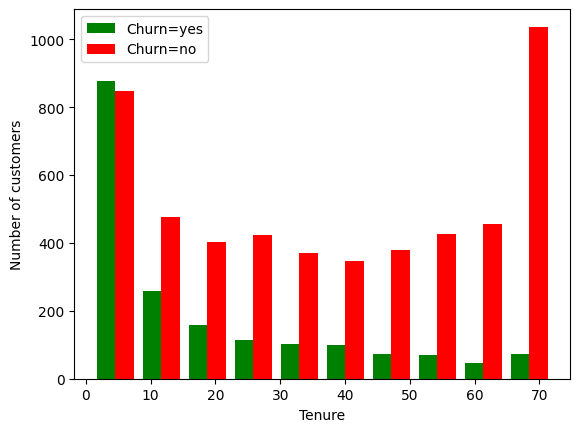

In [107]:
tenure_churn_no=df_new[df_new.Churn=='No'].tenure
tenure_churn_yes=df_new[df_new.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label=['Churn=yes', 'Churn=no'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of customers')

Less Customers are leaving with increasing tenure

Text(0, 0.5, 'Number of customers')

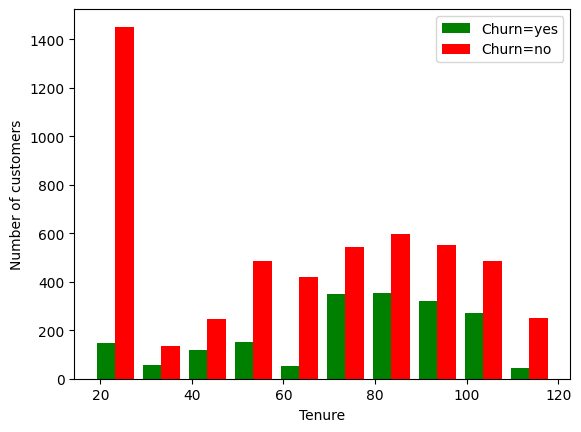

In [108]:
mc_churn_no=df_new[df_new.Churn=='No'].MonthlyCharges
mc_churn_yes=df_new[df_new.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_yes,mc_churn_no], color=['green','red'],label=['Churn=yes', 'Churn=no'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of customers')

Many columns with yes/no values so separating them to do label encoding

In [109]:
def print_unique_col(df_new):
 for column in df_new:
    if df_new[column].dtypes=='object':
     print(f'{column} : {df_new[column].unique()})')

In [110]:
print_unique_col(df_new)

gender : ['Female' 'Male'])
Partner : ['Yes' 'No'])
Dependents : ['No' 'Yes'])
PhoneService : ['No' 'Yes'])
MultipleLines : ['No phone service' 'No' 'Yes'])
InternetService : ['DSL' 'Fiber optic' 'No'])
OnlineSecurity : ['No' 'Yes' 'No internet service'])
OnlineBackup : ['Yes' 'No' 'No internet service'])
DeviceProtection : ['No' 'Yes' 'No internet service'])
TechSupport : ['No' 'Yes' 'No internet service'])
StreamingTV : ['No' 'Yes' 'No internet service'])
StreamingMovies : ['No' 'Yes' 'No internet service'])
Contract : ['Month-to-month' 'One year' 'Two year'])
PaperlessBilling : ['Yes' 'No'])
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'])
Churn : ['No' 'Yes'])


In [111]:
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)
print_unique_col(df_new)

gender : ['Female' 'Male'])
Partner : ['Yes' 'No'])
Dependents : ['No' 'Yes'])
PhoneService : ['No' 'Yes'])
MultipleLines : ['No' 'Yes'])
InternetService : ['DSL' 'Fiber optic' 'No'])
OnlineSecurity : ['No' 'Yes'])
OnlineBackup : ['Yes' 'No'])
DeviceProtection : ['No' 'Yes'])
TechSupport : ['No' 'Yes'])
StreamingTV : ['No' 'Yes'])
StreamingMovies : ['No' 'Yes'])
Contract : ['Month-to-month' 'One year' 'Two year'])
PaperlessBilling : ['Yes' 'No'])
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'])
Churn : ['No' 'Yes'])


C:\Users\USER\AppData\Local\Temp\ipykernel_10944\3035308048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No internet service','No',inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10944\3035308048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace('No phone service','No',inplace=True)


In [112]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df_new.replace({'Yes':1,'No':0},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10944\3263725240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace({'Yes':1,'No':0},inplace=True)


In [113]:
for column in df_new:
     print(f'{column} : {df_new[column].unique()})')

gender : ['Female' 'Male'])
SeniorCitizen : [0 1])
Partner : [1 0])
Dependents : [0 1])
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39])
PhoneService : [0 1])
MultipleLines : [0 1])
InternetService : ['DSL' 'Fiber optic' 0])
OnlineSecurity : [0 1])
OnlineBackup : [1 0])
DeviceProtection : [0 1])
TechSupport : [0 1])
StreamingTV : [0 1])
StreamingMovies : [0 1])
Contract : ['Month-to-month' 'One year' 'Two year'])
PaperlessBilling : [1 0])
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'])
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ])
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ])
Churn : [0 1])


In [114]:
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [115]:
df_new.replace({'Female':1,'Male':0},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10944\1307249774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace({'Female':1,'Male':0},inplace=True)


One Hot Encoding

In [116]:
df_new=pd.get_dummies(data=df_new, columns=['InternetService','Contract','PaymentMethod'], dtype=int)
df_new


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [118]:
df_new.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int32
InternetService_DSL                          int32
InternetService_Fiber optic    

## 3. Scaling Data

MinMaxScaler converts values in (0-1)

In [119]:
cols_to_scale=['MonthlyCharges','TotalCharges','tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])

In [120]:
df_new.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1298,1,0,1,1,0.323944,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
1149,0,0,1,1,0.169014,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
1245,0,1,1,0,0.309859,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1951,0,0,1,0,0.183099,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [122]:
for column in df_new:
     print(f'{column} : {df_new[column].unique()})')

gender : [1 0])
SeniorCitizen : [0 1])
Partner : [1 0])
Dependents : [0 1])
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127])
PhoneService : [0 1])
MultipleLines : [0 1])
OnlineSecurity : [0 1])
OnlineBackup : [1 0])
DeviceProtection : [

## 4. Model fitting

In [123]:
X=df_new.drop('Churn',axis='columns')
Y=df_new['Churn']

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [125]:
X_train.shape

(5625, 26)

In [126]:
X_test.shape

(1407, 26)

output is binary (0 or 1) so loss is binary crossentropy

In [131]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 2s 4ms/step - loss: 0.5089 - accuracy: 0.7511
Epoch 2/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.7956
Epoch 3/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4211 - accuracy: 0.8021
Epoch 4/50
176/176 [==============================] - 1s 8ms/step - loss: 0.4167 - accuracy: 0.8021
Epoch 5/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4142 - accuracy: 0.8052
Epoch 6/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4127 - accuracy: 0.8055
Epoch 7/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4117 - accuracy: 0.8057
Epoch 8/50
176/176 [==============================] - 1s 7ms/step - loss: 0.4107 - accuracy: 0.8059
Epoch 9/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4100 - accuracy: 0.8076
Epoch 10/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8053

## 5. Model Testing

In [132]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 2s 5ms/step - loss: 0.4447 - accuracy: 0.7797


[0.44472864270210266, 0.7796730399131775]

In [138]:
yp=model.predict(X_test)
yp[:5]

44/44 [==============================] - 1s 4ms/step


array([[0.19931118],
       [0.3800726 ],
       [0.01905944],
       [0.67239094],
       [0.40895188]], dtype=float32)

In [139]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [140]:
y_pred=[]
for ele in yp:
    if(ele>0.5):
     y_pred.append(1)
    else:
       y_pred.append(0)

y_pred[:5]        


[0, 0, 0, 1, 0]

Classification Report (Precision and Recall)

In [141]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.66      0.49      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Accuracy=correct predictions/total predictions

Precision(0)=Correct 0 predictions/Total 0 predictions

Recall(0)=Corrrect 0 predictions/total actual 0 values

Text(95.72222222222221, 0.5, 'Truth')

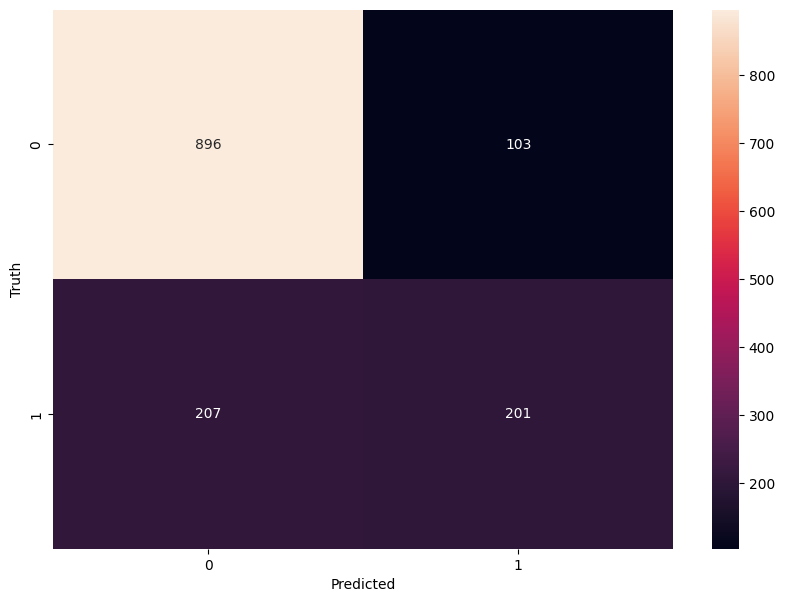

In [142]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')